In [0]:
from google.colab import files
files.upload()

In [0]:
!pip3 install keras_sequential_ascii

  Created wheel for keras-sequential-ascii: filename=keras_sequential_ascii-0.1.1-cp36-none-any.whl size=3062 sha256=bfb79a28d34222464504ef7f2e0f4fa0a6d3736c58ccb632e15a87802e9f328a
  Stored in directory: /root/.cache/pip/wheels/f5/8d/81/912666dff82a923ce423a7e797cd75f54271c7031512cdb282
Successfully built keras-sequential-ascii


#Importing the dataset

Import the libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

Import the dataset

In [0]:
dataset=pd.read_csv("Skyserver_12_30_2019 4_49_58 PM.csv")
dataset

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1237667968033620000,228.674917,19.179460,19.32631,18.82748,18.65659,18.60481,18.60917,5237,301,5,134,4448615345201370000,QSO,0.438182,3951,55681,672
99996,1237664818210470000,173.757382,36.441603,18.33687,17.30365,17.16037,17.14895,17.14419,4504,301,2,111,2265404129658560000,STAR,-0.000497,2012,53493,340
99997,1237664295297290000,205.426531,38.499053,17.50690,15.63152,15.22328,15.04469,15.28668,4382,301,4,97,2257446413900210000,GALAXY,0.004587,2005,53472,62
99998,1237656537513130000,337.135144,-9.635967,19.33946,17.21436,16.29697,15.86745,15.51556,2576,301,2,105,811847537492257000,GALAXY,0.084538,721,52228,268


Dropping unnecessary columns which do not contribute to the classification of a celestial object.

In [0]:
dataset.drop(columns=['objid','specobjid','fiberid','rerun','mjd','run','camcol','field','plate'],inplace=True)

In [0]:
dataset

,ra,dec,u,g,r,i,z,class,redshift
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,STAR,-0.000093
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,STAR,0.000165
3,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,GALAXY,0.058155
4,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,GALAXY,0.072210
...,...,...,...,...,...,...,...,...,...
99995,228.674917,19.179460,19.32631,18.82748,18.65659,18.60481,18.60917,QSO,0.438182
99996,173.757382,36.441603,18.33687,17.30365,17.16037,17.14895,17.14419,STAR,-0.000497
99997,205.426531,38.499053,17.50690,15.63152,15.22328,15.04469,15.28668,GALAXY,0.004587
99998,337.135144,-9.635967,19.33946,17.21436,16.29697,15.86745,15.51556,GALAXY,0.084538


Let us see if the dataset is balanced or not .

(array([38096., 51323., 10581.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

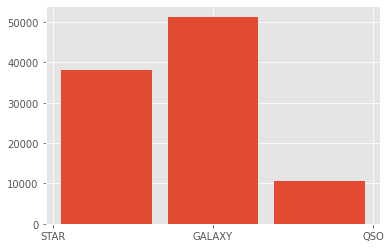

In [0]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(dataset["class"],bins=3,rwidth=0.85)

Clearly the dataset is not balanced , but we will continue and see how it will affect the classification of the celestial objects

#Data Preprocessing

###Seperating the matrix of features and the dependent variable

In [0]:
y=dataset.iloc[:,[7]].values
dataset.drop(columns='class',inplace=True)
X=dataset.values

In [0]:
y

array([['STAR'],
       ['STAR'],
       ['STAR'],
       ...,
       ['GALAXY'],
       ['GALAXY'],
       ['STAR']], dtype=object)

In [0]:
X

array([[ 4.73725449e+01,  8.20620553e-01,  1.86925400e+01, ...,
         1.63466200e+01,  1.61763900e+01,  1.14653600e-04],
       [ 1.16303083e+02,  4.24559804e+01,  1.84763300e+01, ...,
         1.73278000e+01,  1.73711400e+01, -9.27588800e-05],
       [ 1.72756623e+02, -8.78569788e+00,  1.64771400e+01, ...,
         1.57220700e+01,  1.58247100e+01,  1.64580700e-04],
       ...,
       [ 2.05426531e+02,  3.84990534e+01,  1.75069000e+01, ...,
         1.50446900e+01,  1.52866800e+01,  4.58666300e-03],
       [ 3.37135144e+02, -9.63596714e+00,  1.93394600e+01, ...,
         1.58674500e+01,  1.55155600e+01,  8.45376500e-02],
       [ 3.74401880e+01,  2.54008880e+01,  1.81176900e+01, ...,
         1.60758200e+01,  1.59470100e+01, -8.46093100e-05]])

###Encoding the dependent variable

In [0]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y

array([2, 2, 2, ..., 0, 0, 2])

###Splitting the dataset into training set and test set

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

### Applying feature scaling to ease computation 

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

#Designing the neural network

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras 

**Iterative program  to give the neural network:**
The objective of the following iteration is to see the effect the adding hidden layers to neural network. We have defined a list that contains the number of hidden layers to be added in each iteration. Essentially this program creates diffrent neural networks with different number of hidden layers .

In [0]:
layers=[1,3,5,7,9,10]

for i in range(len(layers)):
  print("This is the ",i+1," iteration for finding the better neural network.")
  classifier=Sequential() #initialising the neural network
  classifier.add(Dense(output_dim=5,init='uniform',activation='relu',input_dim=8)) #making the input layer
  hidden_layers=layers[i]

  for i in range(hidden_layers):
    classifier.add(Dense(output_dim=10,init='uniform',activation='relu')) #iteration for adding different numbers of hidden layers
    classifier.add(Dropout(0.1)) #dropout , to randomly remove neurons in each layer so as to avoid overfitting

  classifier.add(Dense(output_dim=3,init='uniform',activation='softmax')) #making the output layer
  optimizer=keras.optimizers.Adam(lr=0.001,decay=1e-6) #defining the optimizer 

  classifier.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy']) #compiling the neural network
  classifier.fit(X_train,y_train,batch_size=10,epochs=10,validation_data=(X_test,y_test)) #fitting the classifier

This is the  1 th iteration for finding the better neural network.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=8, units=5, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 36s 448us/step - loss: 0.5013 - accuracy: 0.7931 - val_loss: 0.1662 - val_accuracy: 0.9647
Epoch 2/10
80000/80000 [==============================] - 34s 420us/step - loss: 0.1616 - accuracy: 0.9558 - val_loss: 0.0996 - val_accuracy: 0.9761
Epoch 3/10
80000/80000 [==============================] - 35s 436us/step - loss: 0.1138 - accuracy: 0.9735 - val_loss: 0.0915 - val_accuracy: 0.9754
Epoch 4/10
80000/80000 [==============================] - 34s 422us/step - loss: 0.1008 - accuracy: 0.9755 - val_loss: 0.0843 - val_accuracy: 0.9791
Epoch 5/10
80000/80000 [==============================] - 33s 415us/step - loss: 0.0931 - accuracy: 0.9770 - val_loss: 0.0718 - val_accuracy: 0.9843
Epoch 6/10
80000/80000 [==============================] - 34s 422us/step - loss: 0.0886 - accuracy: 0.9783 - val_loss: 0.0686 - val_accuracy: 0.9829
Epoch 7/10
80000/80000 [==============================] 

Just to be sure that our model is working

In [0]:
y_pred=classifier.predict(X_test)
predictions=[]
for i in y_pred:
  l=i.tolist()
  confidence=max(l)
  classification=l.index(confidence)
  predictions.append(classification)

Making the confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)

In [0]:
cm

array([[10023,    27,   203],
       [   89,  2015,    20],
       [   18,    46,  7559]])

We can see from the confusion matrix that the accuracy is about **97.985%** , which is the validation accuracy for the neural network with the 10 hidden layers.

We can also see that the best accuracy is given by the neural network with **7 hidden layers**. But there is a very small distinction between the accuracy of of a neural network with one hidden layer and seven hidden layers . 

#Visualising the neural network
We can visualise the neural network to get a sense of it's structure and  improve the interpretation of the model.

In [0]:
from keras_sequential_ascii import keras2ascii
keras2ascii(classifier)
print('\n The above diagram is the final iteration of the neural network iteration loop. It has 10 hidden layers.')

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           8
               Dense   XXXXX -------------------        45     4.0%
                relu   #####           5
               Dense   XXXXX -------------------        60     5.3%
                relu   #####          10
             Dropout    | || -------------------         0     0.0%
                       #####          10
               Dense   XXXXX -------------------       110     9.8%
                relu   #####          10
             Dropout    | || -------------------         0     0.0%
                       #####          10
               Dense   XXXXX -------------------       110     9.8%
                relu   #####          10
             Dropout    | || -------------------         0     0.0%
                       #####          10
               Dense   XXXXX -------------------       110     9.8%
                relu   #####          10
             

#Visualising all the neural networks created during the iteration

In [0]:
layers=[1,3,5,7,9,10]

for i in range(len(layers)):
  print(" \n This is iteration-",i+1," \n ")
  classifier=Sequential() #initialising the neural network
  classifier.add(Dense(output_dim=5,init='uniform',activation='relu',input_dim=8)) #making the input layer
  hidden_layers=layers[i]

  for i in range(hidden_layers):
    classifier.add(Dense(output_dim=10,init='uniform',activation='relu')) #iteration for adding different numbers of hidden layers
    classifier.add(Dropout(0.1)) #dropout , to randomly remove neurons in each layer so as to avoid overfitting

  classifier.add(Dense(output_dim=3,init='uniform',activation='softmax')) #making the output layer
  optimizer=keras.optimizers.Adam(lr=0.001,decay=1e-6) #defining the optimizer 

  classifier.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy']) #compiling the neural network
  keras2ascii(classifier)


 
 This is iteration- 1  
 
           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           8
               Dense   XXXXX -------------------        45    32.6%
                relu   #####           5
               Dense   XXXXX -------------------        60    43.5%
                relu   #####          10
             Dropout    | || -------------------         0     0.0%
                       #####          10
               Dense   XXXXX -------------------        33    23.9%
             softmax   #####           3
 
 This is iteration- 2  
 
           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           8
               Dense   XXXXX -------------------        45    12.6%
                relu   #####           5
               Dense   XXXXX -------------------        60    16.8%
                relu   #####          10
             Dropout    | || -------------------         0  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=8, units=5, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3, kernel_initializer="uniform")`
  del sys.path[0]


           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           8
               Dense   XXXXX -------------------        45     7.8%
                relu   #####           5
               Dense   XXXXX -------------------        60    10.4%
                relu   #####          10
             Dropout    | || -------------------         0     0.0%
                       #####          10
               Dense   XXXXX -------------------       110    19.0%
                relu   #####          10
             Dropout    | || -------------------         0     0.0%
                       #####          10
               Dense   XXXXX -------------------       110    19.0%
                relu   #####          10
             Dropout    | || -------------------         0     0.0%
                       #####          10
               Dense   XXXXX -------------------       110    19.0%
                relu   #####          10
             